In [1]:
# https://www.bfs.admin.ch/bfs/fr/home/services/recherche/api.html
# https://dam-api.bfs.admin.ch/hub/swagger-ui/index.html
# communes
# https://www.bfs.admin.ch/bfs/fr/home/services/recherche/api/api-gemeinde.assetdetail.15224055.html

# motorisation
# https://www.pxweb.bfs.admin.ch/sq/ccc96ddd-61a9-49ab-ad7f-dabbc934e8c0

import requests

# Population
dataset_url = 'https://www.pxweb.bfs.admin.ch/api/v1/en/px-x-0102030000_101/px-x-0102030000_101.px'

metadata_response = requests.get(dataset_url)
metadata_json = metadata_response.json()

{'title': 'Permanent resident population by sex and age, 1860-2020', 'variables': [{'code': 'Geschlecht', 'text': 'Sex', 'values': ['0', '1', '2'], 'valueTexts': ['Sex - total', 'Male', 'Female'], 'elimination': True}, {'code': 'Alter', 'text': 'Age', 'values': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100'], 'valueTexts': ['Age - total', '0 years', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', 

In [4]:
print(metadata_json['title'])
for v in metadata_json['variables']:
    print('---')
    print(f"{v['text']} ({v['code']})")
    print(f"{v['valueTexts']} ({v['values']})")

Permanent resident population by sex and age, 1860-2020
---
Sex (Geschlecht)
['Sex - total', 'Male', 'Female'] (['0', '1', '2'])
---
Age (Alter)
['Age - total', '0 years', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10 years', '11 years', '12 years', '13 years', '14 years', '15 years', '16 years', '17 years', '18 years', '19 years', '20 years', '21 years', '22 years', '23 years', '24 years', '25 years', '26 years', '27 years', '28 years', '29 years', '30 years', '31 years', '32 years', '33 years', '34 years', '35 years', '36 years', '37 years', '38 years', '39 years', '40 years', '41 years', '42 years', '43 years', '44 years', '45 years', '46 years', '47 years', '48 years', '49 years', '50 years', '51 years', '52 years', '53 years', '54 years', '55 years', '56 years', '57 years', '58 years', '59 years', '60 years', '61 years', '62 years', '63 years', '64 years', '65 years', '66 years', '67 years', '68 years', '69 years', '70 years'

In [7]:
response2 = requests.post(dataset_url, json={
  "query": [
    {
      "code": "Alter",
      "selection": {
        "filter": "item",
        "values": metadata_json['variables'][1]['values']
      }
    }
  ],
  "response": {
    "format": "json-stat"
  }
})
json = response2.json()

In [8]:
import pandas as pd

values = {"values": json['dataset']['value']}
length = 1
total_length = len(json['dataset']['value'])
for dimension_id in json['dataset']['dimension']['id']:
    dimension = json['dataset']['dimension'][dimension_id]
    
    current_length = len(dimension['category']['index'])
    nb = int(total_length / (length * current_length))
    
    v = list(json['dataset']['value'])
    for x in range(length):
        for y, value in enumerate(dimension['category']['label'].values()):
            for z in range(nb):
                v[x * current_length * nb + y * nb + z] = value
    
    values[dimension['label']] = v
            
    length *= current_length

df = pd.DataFrame(values)
#print(json['dataset']['value'])
df

,values,Age,Year
0,2515396,Age - total,1860
1,2533077,Age - total,1861
2,2554257,Age - total,1862
3,2575649,Age - total,1863
4,2594555,Age - total,1864
...,...,...,...
16256,2467,99 years or older,2016
16257,2487,99 years or older,2017
16258,2654,99 years or older,2018
16259,2878,99 years or older,2019


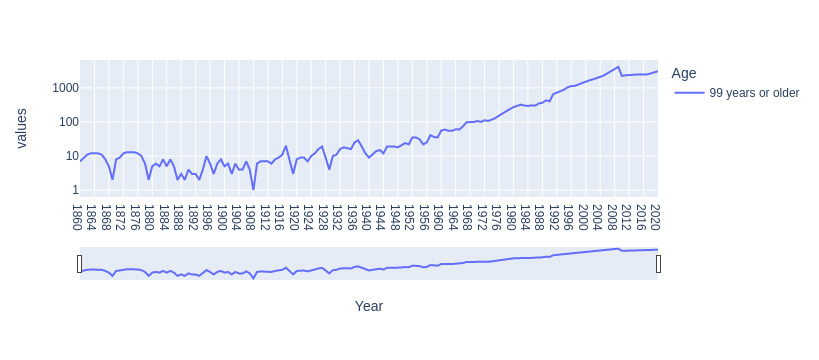

In [10]:
import plotly.express as px

fig = px.line(df.query(f'Age == "99 years or older"'), x="Year", y="values", color='Age')
fig.update_layout(yaxis_type="log",
    xaxis = {
        'rangeslider': {
            'visible': True
        },
    }
)
fig.show()